In [1]:
#data preparing and cleaning
#importing required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

os.chdir("C:\\Users\\91901\\Desktop\\New folder\\Pyton with arindam dev\\1568699544_comcast_telecom_complaints_data")

In [3]:
R_data=pd.read_csv("Comcast_telecom_complaints_data.csv")
R_data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [4]:
R_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
#coverting date column to datetime datatype
R_data.Date=pd.to_datetime(R_data.Date) 

In [6]:
R_data['Zip code']=R_data['Zip code'].astype(str)

In [7]:
R_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   object        
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usa

In [8]:
# lets verify is there any null value or not
R_data.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [9]:
# extracting month from date column
R_data['month']=R_data.Date.dt.month

In [10]:
R_data['month']=R_data['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])

In [30]:
R_data['month'].head()

0    April
1    April
2    April
3      May
4      May
Name: month, dtype: object

In [12]:
#exploring analysis and visulization

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<AxesSubplot:xlabel='Date'>

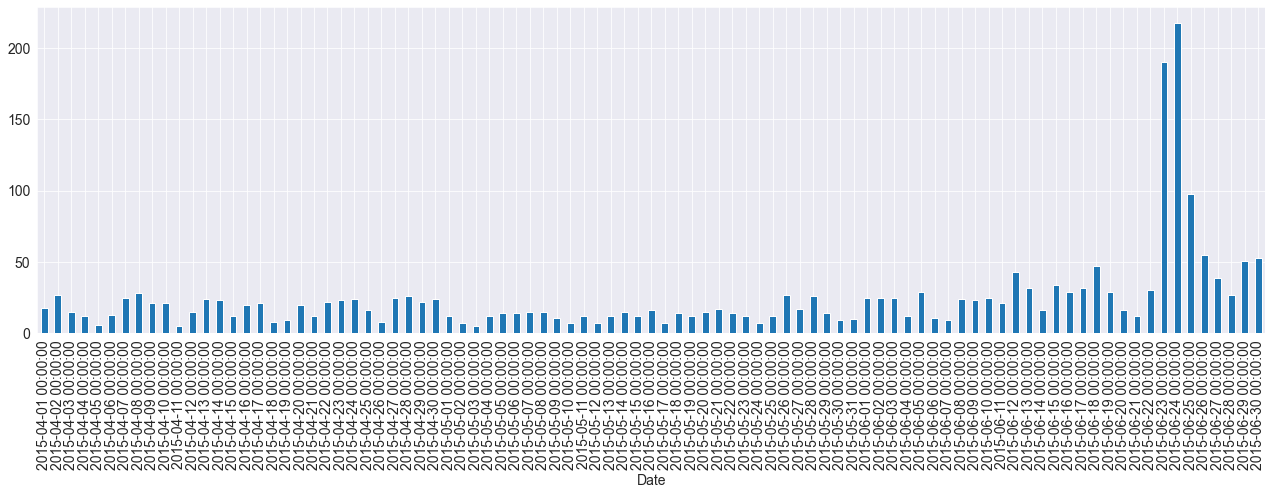

In [13]:
#look out complaint over the date

R_data['Customer Complaint'].groupby(R_data.Date).count().plot(kind='bar',figsize=(22,6))

<AxesSubplot:>

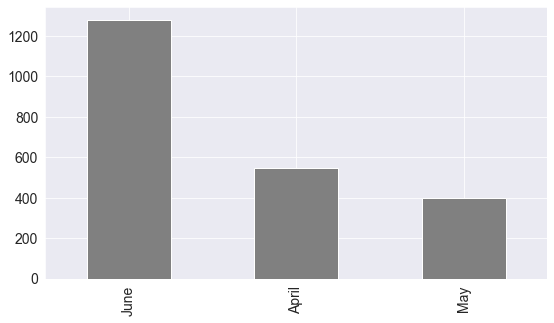

In [14]:
#complaint over the month
R_data['month'].value_counts().plot(kind='bar',color='grey')

<AxesSubplot:xlabel='month', ylabel='count'>

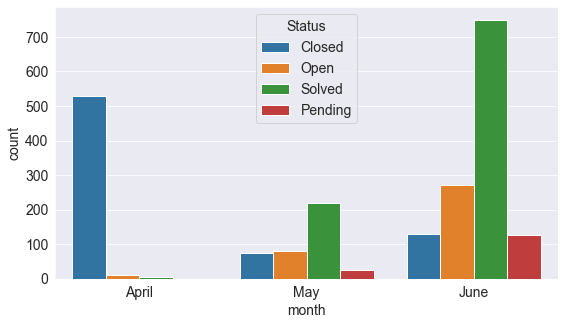

In [15]:
# status of complaints over the months
sns.countplot(x='month', hue='Status', data=R_data)

In [16]:
#finding out which complaints are maximum

from collections import Counter
c_count = Counter(R_data['Customer Complaint'])
d=c_count.most_common(10)
d=pd.DataFrame(d,columns=['type','count'])
d

,type,count
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11
5,Comcast Data Caps,11
6,Comcast Billing,11
7,Unfair Billing Practices,9
8,Internet speed,8
9,Comcast data caps,8


In [17]:
#which state has maximum complaints
statewise_df=R_data[['Ticket #', 'State']].groupby('State').count().sort_values(by='Ticket #',ascending=False)
statewise_df.head()

,Ticket #
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


<AxesSubplot:xlabel='State'>

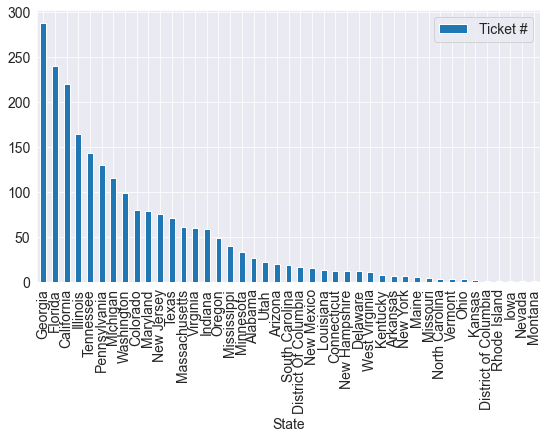

In [18]:
statewise_df.plot(kind='bar')

In [19]:
#Calculating statewise complaint resolving rate
R_data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [20]:
R_data['open/closed']=R_data['Status'].apply(lambda x: 'Closed' if (x =='Solved'or x== 'Closed') else 'Open')

In [21]:
Statewise_solving_rate=R_data.groupby(['State','open/closed'])['open/closed'].count().unstack().fillna(0)
Statewise_solving_rate=pd.DataFrame(Statewise_solving_rate)
Statewise_solving_rate.head(2)

open/closed,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0


In [22]:
Statewise_solving_rate.head()

open/closed,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


<AxesSubplot:xlabel='State'>

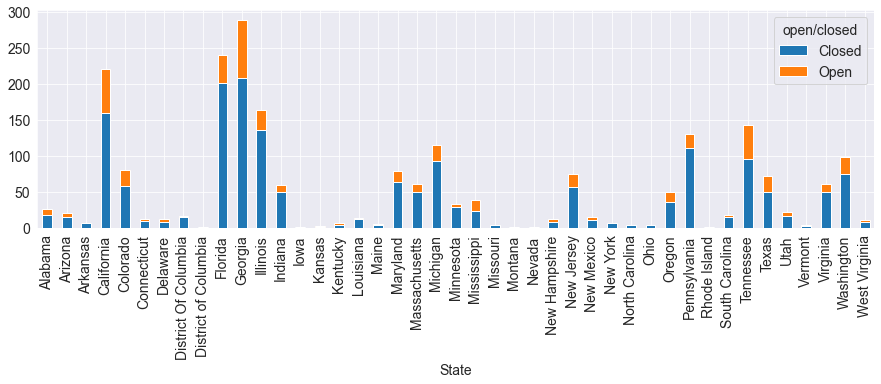

In [23]:
Statewise_solving_rate.plot(kind='bar',stacked=True,figsize=(15,4))

In [24]:
#% of complaints resolved till date
compl=R_data.groupby(['Received Via','open/closed'])['Received Via'].count().unstack()
compl

open/closed,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [25]:
compl=R_data['open/closed'].value_counts()
compl

Closed    1707
Open       517
Name: open/closed, dtype: int64

In [26]:
totcompl=len(R_data)
totcompl

2224

In [27]:
for x in compl.values:
    l=(x/totcompl*100)
    print(l)

76.75359712230215
23.246402877697843
